In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('OlympicAthletesPrediction').getOrCreate()

In [2]:
df = spark.read.csv('/home/ubuntu/722 iteration4/athletes_Olympic.csv',header=True,inferSchema=True)

In [3]:
df.show()
print("Total rows:", df.count())

+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+---------+-------+----------+
| ID|                Name|Sex|Age|Height|Weight|          Team|NOC|      Games|Year|Season|       City|               Sport|               Event|Medal|MedalCode|SexCode|SeasonCode|
+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+---------+-------+----------+
|  1|           A Dijiang|  M| 24|   180|    80|         China|CHN|1992 Summer|1992|Summer|  Barcelona|          Basketball|Basketball Men's ...|   NA|        4|      2|         1|
|  2|            A Lamusi|  M| 23|   170|    60|         China|CHN|2012 Summer|2012|Summer|     London|                Judo|Judo Men's Extra-...|   NA|        4|      2|         1|
|  3| Gunnar Nielsen Aaby|  M| 24|      |      |       Denmark|DEN|1920 Summer|1920|Summer|  An

In [4]:
df.describe().show()

+-------+-----------------+--------------------+------------+-----------------+------------------+------------------+------------------+--------+-----------+------------------+------------------+-----------------+-----------+--------------------+--------------------+--------------------+-------------------+-------------------+
|summary|               ID|                Name|         Sex|              Age|            Height|            Weight|              Team|     NOC|      Games|              Year|            Season|             City|      Sport|               Event|               Medal|           MedalCode|            SexCode|         SeasonCode|
+-------+-----------------+--------------------+------------+-----------------+------------------+------------------+------------------+--------+-----------+------------------+------------------+-----------------+-----------+--------------------+--------------------+--------------------+-------------------+-------------------+
|  count|    

In [5]:
df.select('Age', 'Height', 'Weight').describe().show()

+-------+-----------------+------------------+------------------+
|summary|              Age|            Height|            Weight|
+-------+-----------------+------------------+------------------+
|  count|           271116|            271116|            271116|
|   mean|25.55966371742454|174.85806925299607|  70.9476661272742|
| stddev|6.394817276132616| 13.47956697799403|15.261773430368828|
|    min|                 |                  |                  |
|    max|                M|                 F|                99|
+-------+-----------------+------------------+------------------+



In [6]:
df.filter("Sex='F'AND Medal='Gold'").show()

+----+--------------------+---+---+------+------+-------------+---+-----------+----+------+--------------+----------+--------------------+-----+---------+-------+----------+
|  ID|                Name|Sex|Age|Height|Weight|         Team|NOC|      Games|Year|Season|          City|     Sport|               Event|Medal|MedalCode|SexCode|SeasonCode|
+----+--------------------+---+---+------+------+-------------+---+-----------+----+------+--------------+----------+--------------------+-----+---------+-------+----------+
|  21|Ragnhild Margreth...|  F| 27|   163|      |       Norway|NOR|2008 Summer|2008|Summer|       Beijing|  Handball|Handball Women's ...| Gold|        1|      1|         1|
| 150|Margaret Ives Abb...|  F| 23|      |      |United States|USA|1900 Summer|1900|Summer|         Paris|      Golf|Golf Women's Indi...| Gold|        1|      1|         1|
| 832|Nicola Virginia A...|  F| 29|   164|    51|Great Britain|GBR|2012 Summer|2012|Summer|        London|    Boxing|Boxing Women'

In [7]:
print("Total data points:", df.count())

Total data points: 271116


In [8]:
df.filter('Age=" "').select("ID","Age").show()
print("null values in Age:", df.filter('Age=" "').count())

+---+---+
| ID|Age|
+---+---+
| 54|   |
| 58|   |
| 58|   |
| 66|   |
|102|   |
|102|   |
|133|   |
|139|   |
|163|   |
|163|   |
|163|   |
|163|   |
|163|   |
|163|   |
|163|   |
|163|   |
|167|   |
|173|   |
|176|   |
|179|   |
+---+---+
only showing top 20 rows

null values in Age: 9472


In [9]:
df.filter('Height=" "').select("ID","Height").show()
print("null values in Height:", df.filter('Height=" "').count())

+---+------+
| ID|Height|
+---+------+
|  3|      |
|  4|      |
| 10|      |
| 15|      |
| 15|      |
| 15|      |
| 15|      |
| 15|      |
| 19|      |
| 24|      |
| 24|      |
| 24|      |
| 25|      |
| 27|      |
| 29|      |
| 32|      |
| 38|      |
| 39|      |
| 39|      |
| 39|      |
+---+------+
only showing top 20 rows

null values in Height: 59999


In [10]:
df.filter('Weight=" "').select("ID","Weight").show()
print("null values in Weight:", df.filter('Weight=" "').count())

+---+------+
| ID|Weight|
+---+------+
|  3|      |
|  4|      |
|  8|      |
|  8|      |
| 10|      |
| 15|      |
| 15|      |
| 15|      |
| 15|      |
| 15|      |
| 19|      |
| 21|      |
| 24|      |
| 24|      |
| 24|      |
| 25|      |
| 27|      |
| 29|      |
| 32|      |
| 38|      |
+---+------+
only showing top 20 rows

null values in Weight: 62857


In [11]:
null_df=df.filter('Age=" " or Height=" " or Weight=" "')
null_df.show()
print("Total rows:", null_df.count())

+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+------------+----------------+--------------------+------+---------+-------+----------+
| ID|                Name|Sex|Age|Height|Weight|          Team|NOC|      Games|Year|Season|        City|           Sport|               Event| Medal|MedalCode|SexCode|SeasonCode|
+---+--------------------+---+---+------+------+--------------+---+-----------+----+------+------------+----------------+--------------------+------+---------+-------+----------+
|  3| Gunnar Nielsen Aaby|  M| 24|      |      |       Denmark|DEN|1920 Summer|1920|Summer|   Antwerpen|        Football|Football Men's Fo...|    NA|        4|      2|         1|
|  4|Edgar Lindenau Aabye|  M| 34|      |      |Denmark/Sweden|DEN|1900 Summer|1900|Summer|       Paris|      Tug-Of-War|Tug-Of-War Men's ...|  Gold|        1|      2|         1|
|  8|"Cornelia ""Cor""...|  F| 18|   168|      |   Netherlands|NED|1932 Summer|1932|Summer| Los Angeles| 

In [3]:
df2 = spark.read.csv('/home/ubuntu/722 iteration4/noc_regions.csv',header=True,inferSchema=True)

In [4]:
df_new=df.select('Sex','Age','Height','Weight','NOC','Season','Medal','MedalCode','SexCode','SeasonCode')
df_new.show()

+---+---+------+------+---+------+-----+---------+-------+----------+
|Sex|Age|Height|Weight|NOC|Season|Medal|MedalCode|SexCode|SeasonCode|
+---+---+------+------+---+------+-----+---------+-------+----------+
|  M| 24|   180|    80|CHN|Summer|   NA|        4|      2|         1|
|  M| 23|   170|    60|CHN|Summer|   NA|        4|      2|         1|
|  M| 24|      |      |DEN|Summer|   NA|        4|      2|         1|
|  M| 34|      |      |DEN|Summer| Gold|        1|      2|         1|
|  F| 21|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 21|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 25|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 25|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 27|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 27|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  M| 31|   188|    75|USA|Winter|   NA|        4|      2|         2|
|  M| 31|   188|    

In [5]:
#drop rows with null values
df_clean=df_new.filter('Age!=" " and Height!=" " and Weight!=" "')
df_clean.show()
print("Total rows:", df_clean.count())

+---+---+------+------+---+------+-----+---------+-------+----------+
|Sex|Age|Height|Weight|NOC|Season|Medal|MedalCode|SexCode|SeasonCode|
+---+---+------+------+---+------+-----+---------+-------+----------+
|  M| 24|   180|    80|CHN|Summer|   NA|        4|      2|         1|
|  M| 23|   170|    60|CHN|Summer|   NA|        4|      2|         1|
|  F| 21|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 21|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 25|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 25|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 27|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  F| 27|   185|    82|NED|Winter|   NA|        4|      1|         2|
|  M| 31|   188|    75|USA|Winter|   NA|        4|      2|         2|
|  M| 31|   188|    75|USA|Winter|   NA|        4|      2|         2|
|  M| 31|   188|    75|USA|Winter|   NA|        4|      2|         2|
|  M| 31|   188|    

In [6]:
df_join=df_clean.join(df2,['NOC'])
df_join.show()

+---+---+---+------+------+------+-----+---------+-------+----------+-----------+-----+
|NOC|Sex|Age|Height|Weight|Season|Medal|MedalCode|SexCode|SeasonCode|     region|notes|
+---+---+---+------+------+------+-----+---------+-------+----------+-----------+-----+
|CHN|  M| 24|   180|    80|Summer|   NA|        4|      2|         1|      China| null|
|CHN|  M| 23|   170|    60|Summer|   NA|        4|      2|         1|      China| null|
|NED|  F| 21|   185|    82|Winter|   NA|        4|      1|         2|Netherlands| null|
|NED|  F| 21|   185|    82|Winter|   NA|        4|      1|         2|Netherlands| null|
|NED|  F| 25|   185|    82|Winter|   NA|        4|      1|         2|Netherlands| null|
|NED|  F| 25|   185|    82|Winter|   NA|        4|      1|         2|Netherlands| null|
|NED|  F| 27|   185|    82|Winter|   NA|        4|      1|         2|Netherlands| null|
|NED|  F| 27|   185|    82|Winter|   NA|        4|      1|         2|Netherlands| null|
|USA|  M| 31|   188|    75|Winte

In [7]:
df_format=df_join.select('Sex','Age','Height','Weight','region','Season','Medal','MedalCode','SexCode','SeasonCode')
df_format.show()

+---+---+------+------+-----------+------+-----+---------+-------+----------+
|Sex|Age|Height|Weight|     region|Season|Medal|MedalCode|SexCode|SeasonCode|
+---+---+------+------+-----------+------+-----+---------+-------+----------+
|  M| 24|   180|    80|      China|Summer|   NA|        4|      2|         1|
|  M| 23|   170|    60|      China|Summer|   NA|        4|      2|         1|
|  F| 21|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|
|  F| 21|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|
|  F| 25|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|
|  F| 25|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|
|  F| 27|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|
|  F| 27|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|
|  M| 31|   188|    75|        USA|Winter|   NA|        4|      2|         2|
|  M| 31|   188|    75|        USA|Winter|   NA|        4|      

In [8]:
#add new feature
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
binarize= udf(lambda Medal: '1' if Medal != "NA" else "0")
newdf=df_format.withColumn("MedalorNot", binarize(df_format.Medal))
newdf.show()

+---+---+------+------+-----------+------+-----+---------+-------+----------+----------+
|Sex|Age|Height|Weight|     region|Season|Medal|MedalCode|SexCode|SeasonCode|MedalorNot|
+---+---+------+------+-----------+------+-----+---------+-------+----------+----------+
|  M| 24|   180|    80|      China|Summer|   NA|        4|      2|         1|         0|
|  M| 23|   170|    60|      China|Summer|   NA|        4|      2|         1|         0|
|  F| 21|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|         0|
|  F| 21|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|         0|
|  F| 25|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|         0|
|  F| 25|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|         0|
|  F| 27|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|         0|
|  F| 27|   185|    82|Netherlands|Winter|   NA|        4|      1|         2|         0|
|  M| 31|   188|    7

In [9]:
newdf.filter('Medal="Gold"').select("Medal","MedalorNot").show()
newdf.printSchema()

+-----+----------+
|Medal|MedalorNot|
+-----+----------+
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
| Gold|         1|
+-----+----------+
only showing top 20 rows

root
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Height: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- region: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- Medal: string (nullable = true)
 |-- MedalCode: string (nullable = true)
 |-- SexCode: string (nullable = true)
 |-- SeasonCode: integer (nullable = true)
 |-- MedalorNot: string (nullable = true)



In [9]:
from pyspark.sql.types import IntegerType
newdf = newdf.withColumn("Age", newdf["Age"].cast(IntegerType()))
newdf = newdf.withColumn("Height", newdf["Height"].cast(IntegerType()))
newdf = newdf.withColumn("Weight", newdf["Weight"].cast(IntegerType()))
newdf.printSchema()

root
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Weight: integer (nullable = true)
 |-- region: string (nullable = true)
 |-- Season: string (nullable = true)
 |-- Medal: string (nullable = true)
 |-- MedalCode: string (nullable = true)
 |-- SexCode: string (nullable = true)
 |-- SeasonCode: integer (nullable = true)
 |-- MedalorNot: string (nullable = true)



In [10]:
from pyspark.ml.classification import LogisticRegression

In [11]:
#import Pandas
import pandas as pd
pd.DataFrame(newdf.take(5), columns=newdf.columns)

,Sex,Age,Height,Weight,region,Season,Medal,MedalCode,SexCode,SeasonCode,MedalorNot
0,M,24,180,80,China,Summer,NA,4,2,1,0
1,M,23,170,60,China,Summer,NA,4,2,1,0
2,F,21,185,82,Netherlands,Winter,NA,4,1,2,0
3,F,21,185,82,Netherlands,Winter,NA,4,1,2,0
4,F,25,185,82,Netherlands,Winter,NA,4,1,2,0


In [12]:
newdf.groupby('Medal').count().toPandas()

,Medal,count
0,NA,175420
1,Silver,9826
2,Gold,10081
3,Bronze,10107


In [23]:
newdf.groupby('MedalorNot').count().toPandas()

,MedalorNot,count
0,0,175420
1,1,30014


In [13]:
from pyspark.ml.feature import (VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer)

#Convert each string into a number
Gender_indexer = StringIndexer(inputCol='SexCode',outputCol='GenderIndex')
Season_indexer = StringIndexer(inputCol='SeasonCode',outputCol='SeasonIndex')
Medal_indexer = StringIndexer(inputCol='MedalorNot',outputCol='label')

# Convert various outputs into a single vector.
Gender_encoder = OneHotEncoder(inputCol='GenderIndex',outputCol='GenderVec')
Season_encoder = OneHotEncoder(inputCol='SeasonIndex',outputCol='SeasonVec')

# Turn all columns into one column.
assembler = VectorAssembler(inputCols=['GenderVec','SeasonVec', 'Age', 'Height', 'Weight'], 
                            outputCol="features")

In [14]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[Gender_indexer, Season_indexer, Medal_indexer, Gender_encoder, Season_encoder,  assembler])
pipeline_model = pipeline.fit(newdf)
pipe_df = pipeline_model.transform(newdf)
pipe_df = pipe_df.select('label', 'features')
pipe_df.printSchema()

root
 |-- label: double (nullable = true)
 |-- features: vector (nullable = true)



In [20]:
from pyspark.ml.classification import LogisticRegression

# Split data into 0.6:0.4.
train_data, test_data = pipe_df.randomSplit([0.6,0.4])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)

# Evaluate the model.
results = lr_model.transform(test_data)

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:42761)
Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 827, in _get_connection
    connection = self.deque.pop()
IndexError: pop from an empty deque

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip/py4j/java_gateway.py", line 963, in start
    self.socket.connect((self.address, self.port))
ConnectionRefusedError: [Errno 111] Connection refused


Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:42761)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lr_model.coefficients)

plt.plot(beta)
plt.ylabel('Coefficients')
plt.show()

In [19]:
training_summary = lr_model.summary
ROC = training_summary.roc.toPandas()
plt.plot(ROC['FPR'],ROC['TPR'])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training Set(0.6:0.4) Area Under the Curve: ' + str(training_summary.areaUnderROC))

AttributeError: 'LogisticRegression' object has no attribute 'summary'

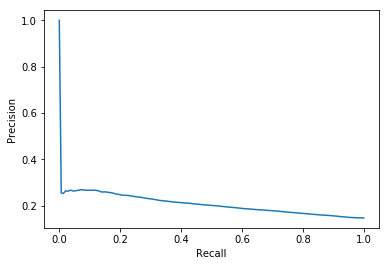

In [18]:
pr = training_summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [15]:
from pyspark.ml.classification import LogisticRegression

# Split data into 0.8:0.2.
train_data, test_data = pipe_df.randomSplit([0.5,0.5])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))
lr_model = LogisticRegression(featuresCol='features',labelCol='label')
lr_model = lr_model.fit(train_data)

# Evaluate the model.
results = lr_model.transform(test_data)

Training Dataset Count: 102522
Test Dataset Count: 102912


In [16]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lr_model.coefficients)

plt.plot(beta)
plt.ylabel('Coefficients')
plt.show()

<Figure size 640x480 with 1 Axes>

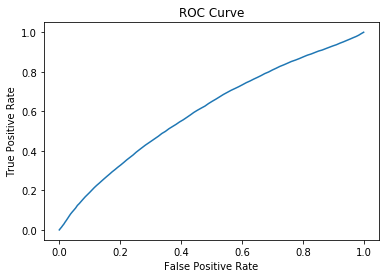

Training set(0.5:0.5) Area Under the Curve: 0.6023291799207646


In [17]:
training_summary = lr_model.summary
ROC = training_summary.roc.toPandas()
plt.plot(ROC['FPR'],ROC['TPR'])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

print('Training set(0.5:0.5) Area Under the Curve: ' + str(training_summary.areaUnderROC))

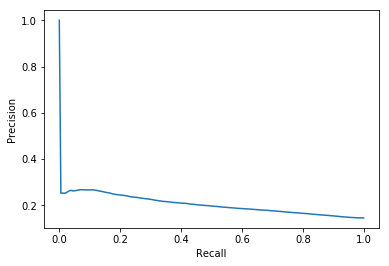

In [29]:
pr = training_summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])

plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()